In [18]:
#|default_exp app

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

In [4]:
import pathlib


In [ ]:
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

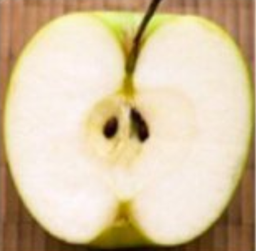

In [5]:
im = PILImage.create('apple.png')
im.thumbnail((256,256))
im

In [6]:
#|export
learn = load_learner('export.pkl')

In [8]:
pred_class,pred_idx,probs = learn.predict(im)
pred_class,pred_idx,probs

('apple',
 TensorBase(0),
 TensorBase([7.7233e-01, 2.2250e-01, 5.1648e-03, 5.1188e-06]))

In [9]:
#|export
catagories = 'apple','barn owl','guacamole','parrot',

def classify_img(img):
    pred_class,pred_idx,probs = learn.predict(img)
    return dict(zip(catagories, map(float,probs)))

In [10]:
classify_img(im)

{'apple': 0.7723259329795837,
 'barn owl': 0.22250410914421082,
 'guacamole': 0.00516480254009366,
 'parrot': 5.11877988174092e-06}

In [ ]:
#|export
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label()
examples = ['apple.png','owl.png','parrot.png','guacamole.png']

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(share = True)

In [11]:
m = learn.model

In [15]:
paras = L(m.parameters())
paras[0].shape

torch.Size([64, 3, 7, 7])

In [32]:
from nbdev.export import notebook2script
notebook2script()

Traceback (most recent call last):
  File "C:\Users\Safi\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Safi\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "g:\Projects\my_first_space\.venv\Scripts\nbdev_export.exe\__main__.py", line 7, in <module>
  File "g:\projects\my_first_space\.venv\lib\site-packages\fastcore\script.py", line 117, in _f
    return tfunc(**merge(args, args_from_prog(func, xtra)))
  File "g:\projects\my_first_space\.venv\lib\site-packages\nbdev\doclinks.py", line 126, in nbdev_export
    _build_modidx()
  File "g:\projects\my_first_space\.venv\lib\site-packages\nbdev\doclinks.py", line 82, in _build_modidx
    res['settings'] = {k:v for k,v in get_config().d.items()
  File "g:\projects\my_first_space\.venv\lib\site-packages\nbdev\doclinks.py", line 82, in <dictcomp>
    res['settings'] = {k:v for k,v